# 문제1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

In [6]:
# Iris 데이터셋 불러오기 및 구조 확인

import seaborn as sns

iris = sns.load_dataset("iris")
print(iris.head())
print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
# 기술통계량 산출

stats = iris.groupby("species")["petal_length"].describe()
print(stats)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


In [8]:
# 그룹별 데이터 개수 확인

counts = iris["species"].value_counts()
print(counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_6357/1515105334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="petal_length", data=iris, palette="Set2")


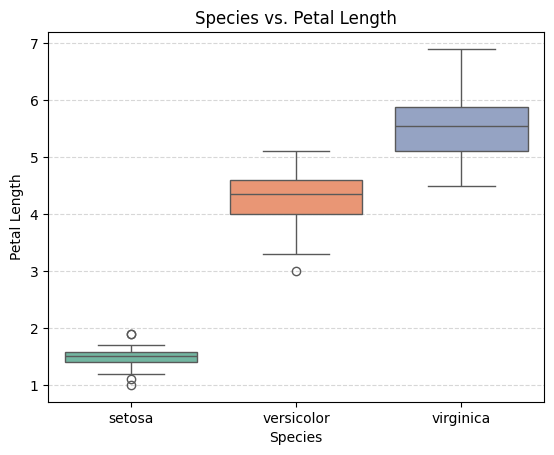

- Virginica의 평균 Petal Length가 가장 크다.
- Setosa의 Petal Length의 분산이 제일 작다.
- 'Virginica의 경우 이상치의 범위가 가장 넓다.


In [9]:
# Boxplot 시각화

import matplotlib.pyplot as plt

sns.boxplot(x="species", y="petal_length", data=iris, palette="Set2")
plt.title("Species vs. Petal Length")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

print("- Virginica의 평균 Petal Length가 가장 크다.")
print("- Setosa의 Petal Length의 분산이 제일 작다.")
print("- 'Virginica의 경우 이상치의 범위가 가장 넓다.")

In [13]:
# Shapiro-Wilk 검정
import scipy.stats as stats

species = iris['species'].unique()

print("Shapiro-Wilk 정규성 검정")
print("귀무가설: 표본 데이터는 정규분포를 따른다.")
print("대립가설: 표본 데이터는 정규분포를 따르지 않는다.\n")

for species in species:
    data = iris[iris['species'] == species]['petal_length']
    stat, p = stats.shapiro(data)
    print(f"{species} - p-value: {p} -> ", end="")
    if p > 0.05:
        print("정규성을 만족함 (귀무가설 채택)")
    else:
        print("정규성을 만족하지 않음 (귀무가설 기각)")


Shapiro-Wilk 정규성 검정
귀무가설: 표본 데이터는 정규분포를 따른다.
대립가설: 표본 데이터는 정규분포를 따르지 않는다.

setosa - p-value: 0.05481146719553462 -> 정규성을 만족함 (귀무가설 채택)
versicolor - p-value: 0.15847783815657573 -> 정규성을 만족함 (귀무가설 채택)
virginica - p-value: 0.10977536903223795 -> 정규성을 만족함 (귀무가설 채택)


In [17]:
# Levene 등분산성 검정
from scipy.stats import levene

setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa, versicolor, virginica)

print("Levene 등분산성 검정")
print("귀무가설: 세 Species는 동일한 분산을 가진다. -> 등분산성 만족")
print("대립가설: 세 Species 중 적어도 한 Species의 분산은 다르다. -> 등분산성 불만족\n")

print(f"p-value: {p} -> ", end="")
if p > 0.05:
    print("등분산성을 만족함 (귀무가설 채택)")
else:
    print("등분산성을 만족하지 않음 (귀무가설 기각)")


Levene 등분산성 검정
귀무가설: 세 Species는 동일한 분산을 가진다. -> 등분산성 만족
대립가설: 세 Species 중 적어도 한 Species의 분산은 다르다. -> 등분산성 불만족

p-value: 3.1287566394085344e-08 -> 등분산성을 만족하지 않음 (귀무가설 기각)


In [20]:
# One-way ANOVA
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print("One-way ANOVA 결과")
print("귀무가설: 3개 Species 간의 평균의 차이가 유의하지 않다.")
print("대립가설: 적어도 하나의 Species의 평균은 나머지와 유의한 차이가 존재한다.\n")

print(f"F 통계량: {f_stat}")
print(f"p-value: {p_value} -> ", end="")

if p_value < 0.05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

One-way ANOVA 결과
귀무가설: 3개 Species 간의 평균의 차이가 유의하지 않다.
대립가설: 적어도 하나의 Species의 평균은 나머지와 유의한 차이가 존재한다.

F 통계량: 1180.161182252981
p-value: 2.8567766109615584e-91 -> 귀무가설 기각


In [21]:
# Tukey HSD 사후검정
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)

print("Tukey HSD 사후검정 결과")
print(tukey.summary())


Tukey HSD 사후검정 결과
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


# 문제2. 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류모델을 학습

In [22]:
# 데이터셋 불러오기 및 데이터 구조 확인
import pandas as pd

data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [25]:
# 정상거래 / 사기거래 건수 확인하기
class_counts = data['Class'].value_counts()
print(class_counts)

class_ratio = class_counts / len(data) * 100
print(class_ratio)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


In [26]:
# 샘플링
data_1 = data[data["Class"] == 1]
data_0 = data[data["Class"] == 0].sample(n=10000, random_state=42)

sampled_data = pd.concat([data_1, data_0], axis=0).reset_index(drop=True)

print(sampled_data['Class'].value_counts())
print(sampled_data['Class'].value_counts(normalize=True) * 100)

Class
0    10000
1      492
Name: count, dtype: int64
Class
0    95.310713
1     4.689287
Name: proportion, dtype: float64


In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sampled_data['Amount_Scaled'] = scaler.fit_transform(sampled_data[['Amount']])

sampled_data = sampled_data.drop(columns=['Amount'])

X = sampled_data.drop(columns=['Class'])
y = sampled_data['Class']

In [30]:
# 학습 데이터셋과 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

Class
0    95.305612
1     4.694388
Name: proportion, dtype: float64
Class
0    95.33111
1     4.66889
Name: proportion, dtype: float64


In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train))


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 7999, 1: 394})
After SMOTE: Counter({0: 7999, 1: 7999})


In [ ]:
# 모델 학습 및 테스트셋 예측값, 예측 확률 확인
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

predict = model.predict(X_test)
predict_proba = model.predict_proba(X_test)[:, 1] 

print(predict)
print(predict_proba)

[0 0 0 ... 0 0 0]
[0.02 0.   0.03 ... 0.   0.   0.01]


In [38]:
# 최종 성능 평가
from sklearn.metrics import classification_report, average_precision_score

print("Classification Report:")
print(classification_report(y_test, predict, digits=4))

pr_auc = average_precision_score(y_test, predict_proba)
print(f"\nPR-AUC : {pr_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0     0.9945    0.9975    0.9960      2001
           1     0.9457    0.8878    0.9158        98

    accuracy                         0.9924      2099
   macro avg     0.9701    0.9426    0.9559      2099
weighted avg     0.9922    0.9924    0.9923      2099


PR-AUC : 0.9538
